In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 1) Load Dataset
df = pd.read_csv("ASL-68287-train.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,153,155,157,159,160,163,165,165,166,...,187,214,209,208,207,204,203,202,203,200
1,21,175,175,173,173,173,175,176,176,176,...,46,46,44,46,46,52,55,51,54,55
2,24,199,201,205,206,208,211,211,212,213,...,46,34,86,255,255,255,255,255,247,214
3,20,125,125,127,131,132,133,132,133,135,...,54,11,118,166,154,155,154,154,152,148
4,14,4,4,3,3,3,4,4,4,4,...,94,104,121,180,183,187,188,188,191,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54625,22,175,177,179,181,182,183,185,185,185,...,190,166,106,96,103,100,99,85,66,48
54626,12,166,167,169,170,170,171,173,173,172,...,83,61,170,194,188,189,188,186,185,183
54627,24,123,126,125,127,130,132,133,135,137,...,23,24,61,121,124,126,124,124,123,123
54628,21,172,173,176,179,182,183,183,184,185,...,112,120,219,225,225,214,155,114,102,93


In [16]:
print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())

Dataset shape: (54630, 785)
First 5 rows:
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      5     153     155     157     159     160     163     165     165   
1     21     175     175     173     173     173     175     176     176   
2     24     199     201     205     206     208     211     211     212   
3     20     125     125     127     131     132     133     132     133   
4     14       4       4       3       3       3       4       4       4   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     166  ...       187       214       209       208       207       204   
1     176  ...        46        46        44        46        46        52   
2     213  ...        46        34        86       255       255       255   
3     135  ...        54        11       118       166       154       155   
4       4  ...        94       104       121       180       183       187   

   pixel781  pixel782  pixel783

In [2]:
# 2) Detect label column
if "label" in df.columns:
    y = df["label"].values
    X = df.drop("label", axis=1).values
elif "class" in df.columns:
    y = df["class"].values
    X = df.drop("class", axis=1).values
else:
    # If label is first column
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values

print("\nX shape:", X.shape)
print("y shape:", y.shape)
print("Unique classes:", np.unique(y))


X shape: (54630, 784)
y shape: (54630,)
Unique classes: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [3]:

# 3) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# 4) Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 5) Logistic Regression (Original Data)
lr_original = LogisticRegression(max_iter=3000, n_jobs=-1)
lr_original.fit(X_train_scaled, y_train)

y_pred_original = lr_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)

print("\n✅ Accuracy (Original features):", acc_original)




✅ Accuracy (Original features): 0.981511989749222


In [29]:
# 6) PCA + Logistic Regression
components_list = [2, 10, 30, 50]
pca_results = {}

for n in components_list:
    pca = PCA(n_components=n, random_state=42)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr_pca = LogisticRegression(max_iter=3000, n_jobs=-1)
    lr_pca.fit(X_train_pca, y_train)

    y_pred = lr_pca.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)

    pca_results[n] = {
        "accuracy": acc,
        "explained_variance": np.sum(pca.explained_variance_ratio_)
    }

    print(f"\n📌 PCA Components = {n}")
    print("Explained Variance (Total):", pca_results[n]["explained_variance"])
    print("Accuracy:", acc)


📌 PCA Components = 2
Explained Variance (Total): 0.48608855330932876
Accuracy: 0.09161632802489475

📌 PCA Components = 10
Explained Variance (Total): 0.7263131355858208
Accuracy: 0.39923119165293797

📌 PCA Components = 30
Explained Variance (Total): 0.855662191079895
Accuracy: 0.6906461651107451

📌 PCA Components = 50
Explained Variance (Total): 0.8990548563151801
Accuracy: 0.7667032765879553


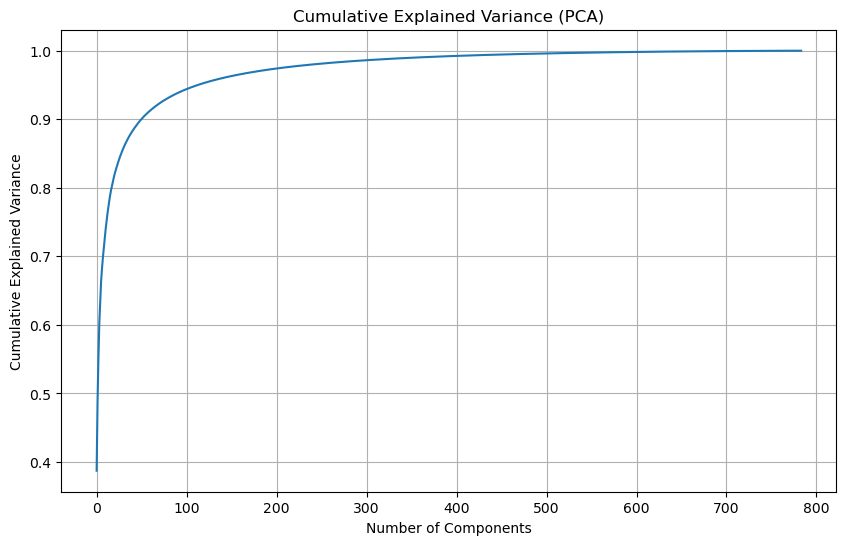

In [24]:
# 7) Cumulative Explained Variance Plot
pca_full = PCA()
pca_full.fit(X_train_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cum_var)
plt.title("Cumulative Explained Variance (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.savefig("Explained Variance Plot")
plt.show()

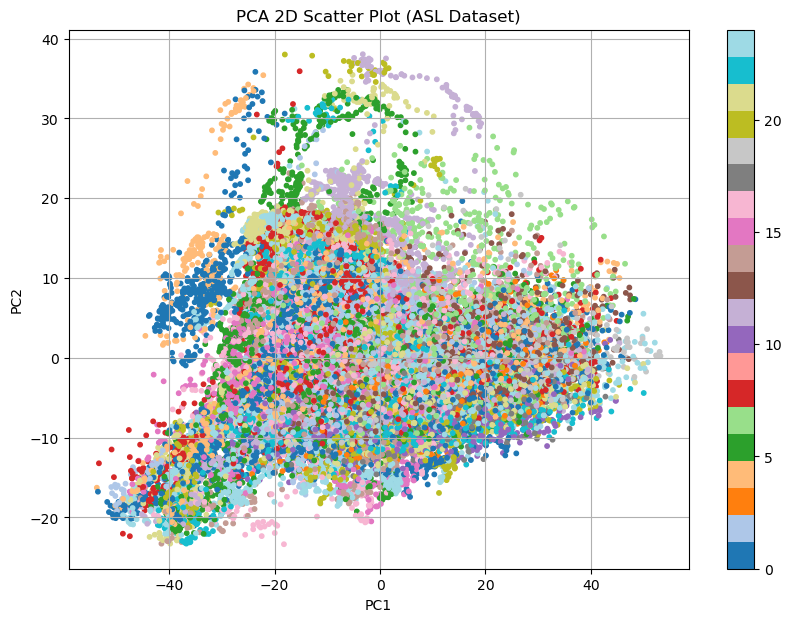

In [7]:
# 8) PCA 2D Scatter Plot
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_train_scaled)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap="tab20", s=10)
plt.title("PCA 2D Scatter Plot (ASL Dataset)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter)
plt.grid(True)
plt.show()


In [20]:
# 9) Final Accuracy Comparison Report
print("\n==============================")
print("📊 FINAL ACCURACY COMPARISON")
print("==============================")
print(f"Original: {acc_original:.4f}")

for n in components_list:
    print(f"PCA ({n} components): {pca_results[n]['accuracy']:.4f}")


📊 FINAL ACCURACY COMPARISON
Original: 0.9815
PCA (2 components): 0.0916
PCA (10 components): 0.3992
PCA (30 components): 0.6906
PCA (50 components): 0.7667


In [30]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("ASL-68287-train.csv")

# Detect label column
if "label" in df.columns:
    y = df["label"]
    X = df.drop("label", axis=1)
    label_name = "label"
elif "class" in df.columns:
    y = df["class"]
    X = df.drop("class", axis=1)
    label_name = "class"
else:
    y = df.iloc[:, 0]
    X = df.iloc[:, 1:]
    label_name = df.columns[0]

print("X shape:", X.shape)
print("y shape:", y.shape)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA components to save
components_list = [2, 10, 30, 50]

for n in components_list:
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    # Create reduced dataframe
    reduced_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n)])
    reduced_df[label_name] = y.values  # add label back

    # Save
    file_name = f"ASL_reduced_PCA_{n}.csv"
    reduced_df.to_csv(file_name, index=False)

    print(f"✅ Saved: {file_name} | Shape: {reduced_df.shape}")

X shape: (54630, 784)
y shape: (54630,)
✅ Saved: ASL_reduced_PCA_2.csv | Shape: (54630, 3)
✅ Saved: ASL_reduced_PCA_10.csv | Shape: (54630, 11)
✅ Saved: ASL_reduced_PCA_30.csv | Shape: (54630, 31)
✅ Saved: ASL_reduced_PCA_50.csv | Shape: (54630, 51)
